# ML in data analysis
Using machine learning technologies to analyze data and make business recommendations.
The goal is to analyze and prepare an action plan for customer retention.

- learn how to predict the probability of outflow (at the level of the next month) for each client;
- form typical customer portraits: identify several of the most striking groups and characterize their main properties;
- analyze the main features that most strongly affect the outflow;
- formulate the main conclusions and develop recommendations for improving the quality of work with clients:
    1) identify target customer groups;
    2) propose measures to reduce churn;
    3) determine other features of interaction with customers.

Data discription:

- 'Churn' — outflow fact in the current month;

Current fields in the dataset:
        
User data for the previous month before checking the outflow fact:

- 'gender'

- 'Near_Location' - living or working in the area where the fitness center is located

- 'Partner' - an employee of the club's partner company (cooperation with companies whose employees can receive discounts for a subscription - in this case, the fitness center stores information about the client's employer)

- Promo_friends - the fact of the initial registration as part of the “bring a friend” promotion (used a promo code from a friend when paying for the first subscription)

- 'Phone' — availability of a contact phone number
- 'Age' — age
            
- 'Lifetime' - time since the first access to the fitness center (in months)

Information based on the history of visits, purchases and information about the current status of the client's subscription

- 'Contract_period' — duration of the current active subscription (month, 3 months, 6 months, year)
        
- 'Month_to_end_contract' — term until the end of the current active subscription (in months)
        
- 'Group_visits' — the fact of attending group classes

- 'Avg_class_frequency_total' — the average frequency of visits per week for the entire time since the start of the subscription
        
- 'Avg_class_frequency_current_month' — average frequency of visits per week for the previous month
        
- 'Avg_additional_charges_total' — total revenue from other services of the fitness center: cafe, sports goods, beauty and massage salon

# Step 1 - Data importing


In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from IPython.display import display


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('use_inf_as_na', False)

In [3]:
# import data
try:
    path = 'data/'
    df = pd.read_csv(path + 'gym_churn.csv')
except FileNotFoundError as e:
    print(repr(e))

    df = pd.read_csv('/datasets/gym_churn.csv')

In [4]:
# let's print the size and first lines of the file

print(df.shape)
display(df.head(5))

(4000, 14)


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
# let's look at the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

# Step 2 - Conduct Exploratory Data Analysis (EDA)

In [6]:
# Let's look at the dataset: are there missing features in it, study the means and standard deviations

df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


- standard deviations are not large,
- max too, 
- there are no outliers in the data

can continue working with these data.

In [7]:
# Let's look at the average values of the features in two groups - those who left in the outflow and those who remained

df.groupby('Churn').agg('mean')

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Clients with shorter contracts and younger than 27 usually leave

More often there are people around 30 with a long contract who came at the invitation of friends or companies.

The gender distribution is approximately equal

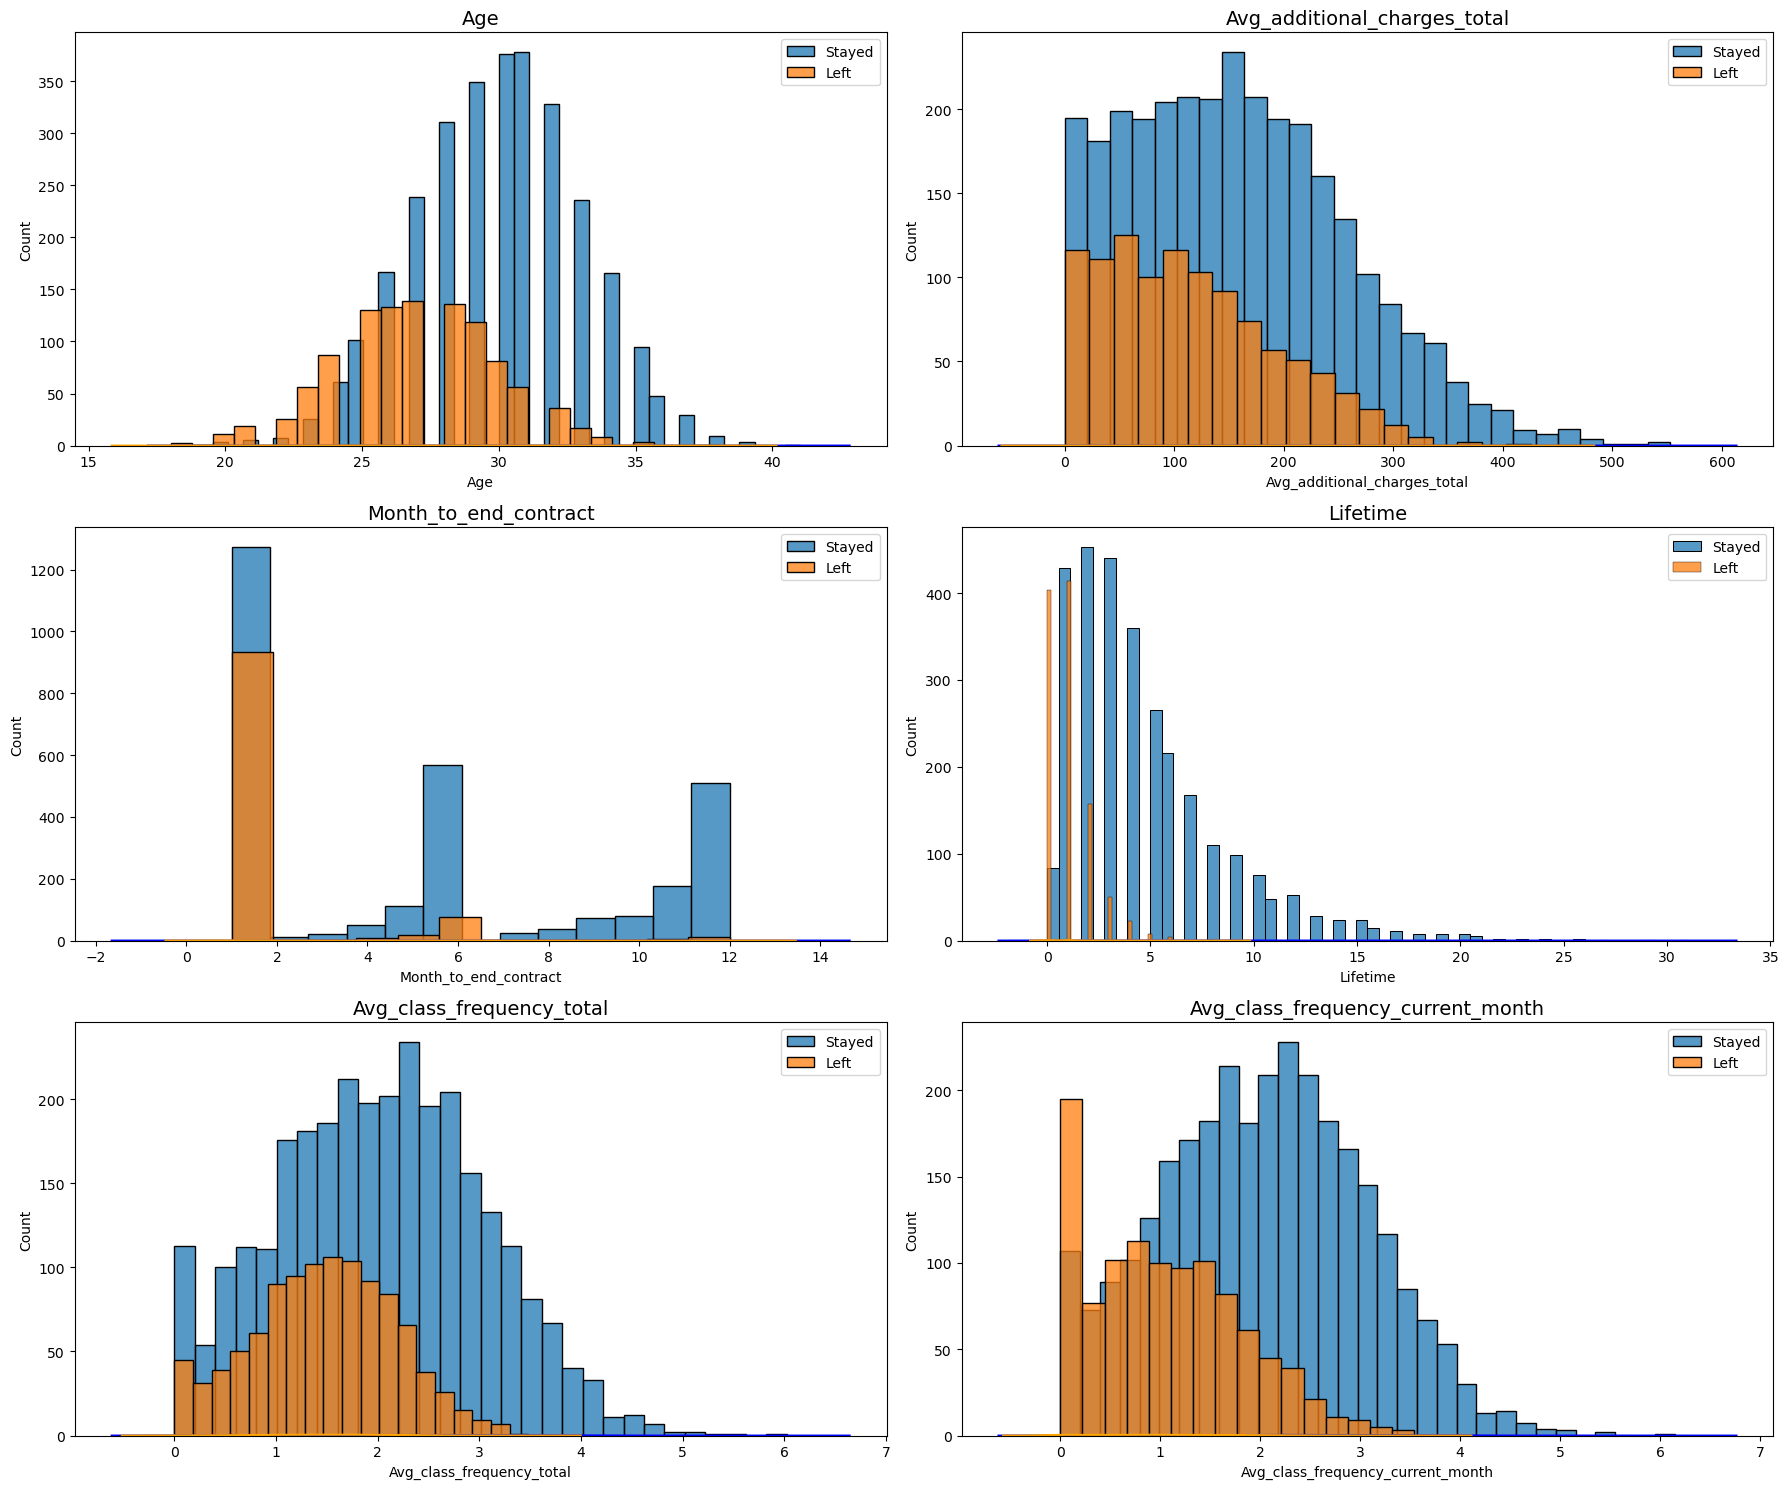

In [8]:
# Let's build bar graphs and feature distributions for those who left (churn) and those who stayed (didn't get into churn)

# select columns for drawing charts

cols = df.drop(columns = [
    'gender',
    'Near_Location',
    'Partner',
    'Promo_friends',
    'Phone',
    'Contract_period',
    'Group_visits',
    'Churn'
]).columns

# set the chart size

fig, axes = plt.subplots(3,2, figsize = (18, 15))
axes = axes.ravel()
df.fillna(df.mean(), inplace=True)

for col, ax in zip(cols, axes):
    #sns.distplot(df[df['Churn'] == 0][col], ax = ax, label = 'Stayed')
    #sns.distplot(df[df['Churn'] == 1][col], ax = ax, label = 'Left')

    sns.histplot(df[df['Churn'] == 0][col], ax = ax, label = 'Stayed')
    sns.histplot(df[df['Churn'] == 1][col], ax = ax, label = 'Left')
    sns.kdeplot(df[df['Churn'] == 0][col], ax = ax, common_norm=True, color='blue')
    sns.kdeplot(df[df['Churn'] == 1][col], ax = ax, common_norm=True, color='orange')

    # sns.histplot(df[df['Churn'] == 0][col], ax = ax)
    # sns.histplot(df[df['Churn'] == 1][col], ax = ax)


    ax.set_title(f'{col}', fontsize = 14)
    ax.legend()

fig.tight_layout()
plt.show()

Age data are distributed "normally"

part of the data tends to a normal distribution

there are minor outliers


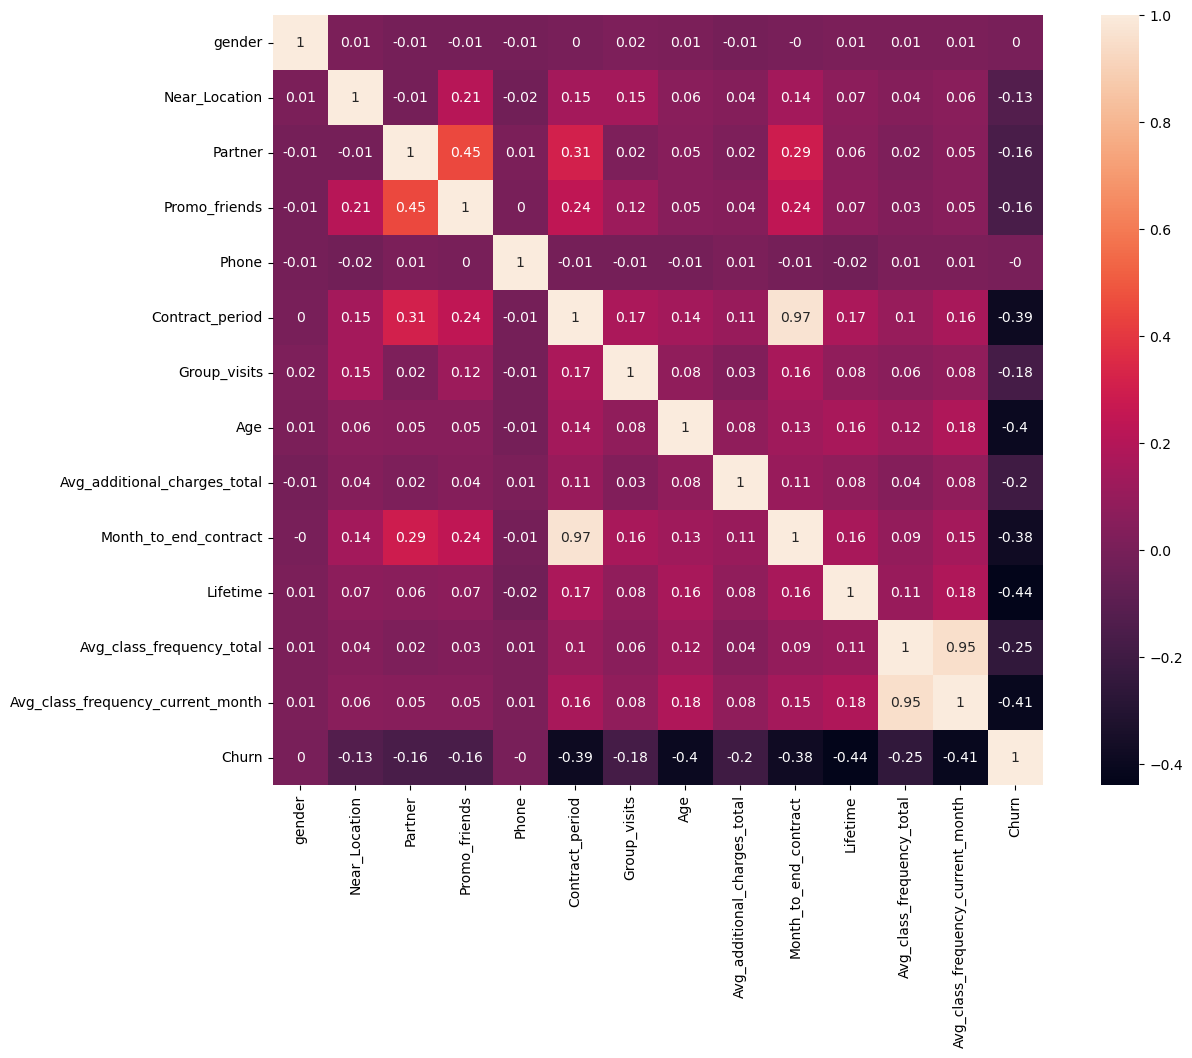

In [9]:
# let's calculate the correlation matrix
cm = df.corr().round(2) 

# let's draw a heat map with labels for the correlation matrix
plt.figure(figsize=(15, 10)) 
sns.heatmap(cm, annot=True, square=True)
plt.show()

In [10]:
# The matrix showed features with a strong correlation - remove them from the analysis
df = df.drop(['Month_to_end_contract'], axis=1)
df = df.drop(['Avg_class_frequency_current_month'], axis=1)

# Step 3 - Build a Churn Prediction Model

In [87]:
# let's build a binary classification model of customers, where the target feature is the fact that a customer churns in the next month

# create an instance of the StandardScaler class
scaler = StandardScaler()

# we divide our data into features (matrix X) and target variable (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

# we divide the model into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0, stratify = y)

# create an object of the StandardScaler class and apply it to the training samplescaler = StandardScaler()
X_train_st = scaler.fit_transform(
    X_train
)  

# apply standardization to the feature matrix for the test sample
X_test_st = scaler.transform(X_test)

In [88]:
# let's train the model on the train sample in two ways:
    #l ogistic regression,
    # random forest.
    
models = [
    LogisticRegression(random_state=0),
    RandomForestClassifier(n_estimators = 100, random_state=0),
]

In [89]:
# a function that takes a model and data as input and outputs metrics

def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    print(
        'Accuracy: {:.2f} / Precision: {:.2f} / Recall: {:.2f}'.format(
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred),
        )
    )

In [91]:
# let's evaluate the accuracy, precision and recall metrics for both models on the validation set. Let's compare models.

# loop to run the function and output the metrics
for i in models:
    print()
    print(f'metrics for {i}:')
    make_prediction(
        m=i,
        X_train=X_train_st,
        y_train=y_train,
        X_test=X_test_st,
        y_test=y_test,
    )


metrics for LogisticRegression(random_state=0):
Accuracy: 0.91 / Precision: 0.83 / Recall: 0.83

metrics for RandomForestClassifier(random_state=0):
Accuracy: 0.89 / Precision: 0.81 / Recall: 0.79


The LogisticRegression model shows the best performance for all three measures

# Step 4 - Make User Clustering

In [93]:
# set aside the churn column and cluster the objects (users)

data = df.drop(['Churn'], axis=1)

# standardize the data

sc = StandardScaler()
X_sc = sc.fit_transform(data)

# let's build a distance matrix using the linkage() function on a standardized feature matrix and draw a dendrogram

linked = linkage(X_sc, method = 'ward')

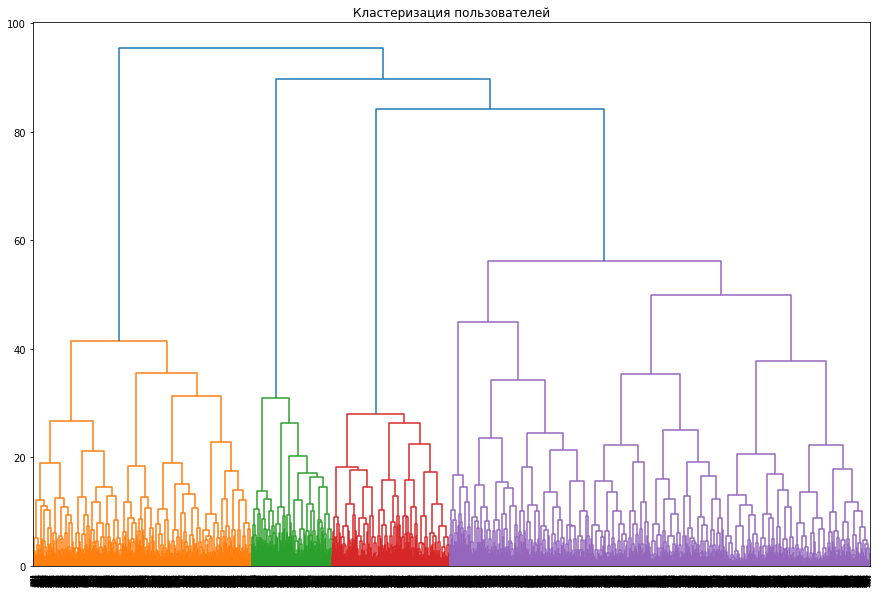

In [94]:
# let's train a clustering model based on the K-Means algorithm and predict customer clusters

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Кластеризация пользователей')
plt.show()

dendrogram shows us 4 clusters

5 clusters will do like this

In [95]:
# set the k_means model with 5 clusters and fix the random_state value
km = KMeans(n_clusters=5, random_state=0)

labels = km.fit_predict(X_sc)

# save the cluster labels in the field of our dataset
df['cluster_user'] = labels

In [96]:
# let's look at the average values of features for clusters

display(df.groupby('cluster_user').mean())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_total,Churn
cluster_user,,,,,,,,,,,,
0,0.499109,0.000000,0.488414,0.076649,1.0,3.032086,0.235294,28.721925,137.540009,3.060606,1.770413,0.399287
1,0.488571,0.995238,0.955238,0.892381,1.0,7.660952,0.458095,29.543810,155.861428,4.380952,1.978963,0.120952
2,0.505300,1.000000,0.238516,0.059187,1.0,2.819788,0.000000,28.770318,143.383993,3.343640,1.800647,0.381625
3,0.544202,1.000000,0.250287,0.079219,1.0,4.528129,1.000000,29.536165,148.088897,3.761194,1.941342,0.200918
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.854211,0.266839


In cluster 0, all clients live or work at a considerable distance from the club, here is the highest level of client churn

In cluster 1, the majority of clients, on the contrary, live or work near the club and most often have a long contract. This cluster has the lowest level of care.

In clusters 2 and 3, all clients live or work close to home, the average contract duration is about 5 months

0 and 2 clusters are most prone to churn

3 and 4 moderately churn

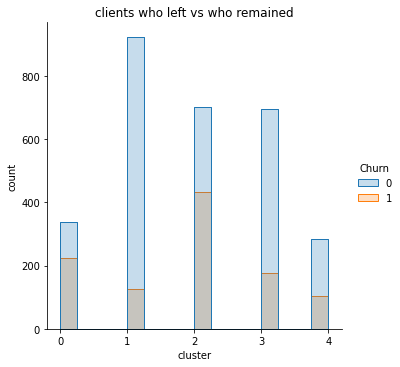

In [97]:
#

plt.figsize=(10, 5)
sns.displot(df,x = 'cluster_user', hue = 'Churn', element="step")
plt.xlabel('cluster')
plt.ylabel('count')
plt.title('clients who left vs who remained')
plt.style.use('seaborn-talk')
plt.show()

The graph shows the ratio of clients who extended their contract - 0 and clients who left - 1 in each of the resulting clusters.

It can be seen in clusters 1, 3 that the clients who remained prevail.

In clusters 0 and 2, most of the clients left.

There are 4 of those who remained in the cluster, but not by much.

This graph is indicative, because clients with characteristics like in clusters 1 and 3 will be our potential targets for new contracts and attraction. The remaining clusters can be used to improve the quality of services.

/var/folders/5s/3mthpp315y55q6wdwjdmg3nm0000gn/T/ipykernel_8680/2800243227.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['cluster_user'] == 0][col], ax = ax, label = '0')
/var/folders/5s/3mthpp315y55q6wdwjdmg3nm0000gn/T/ipykernel_8680/2800243227.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


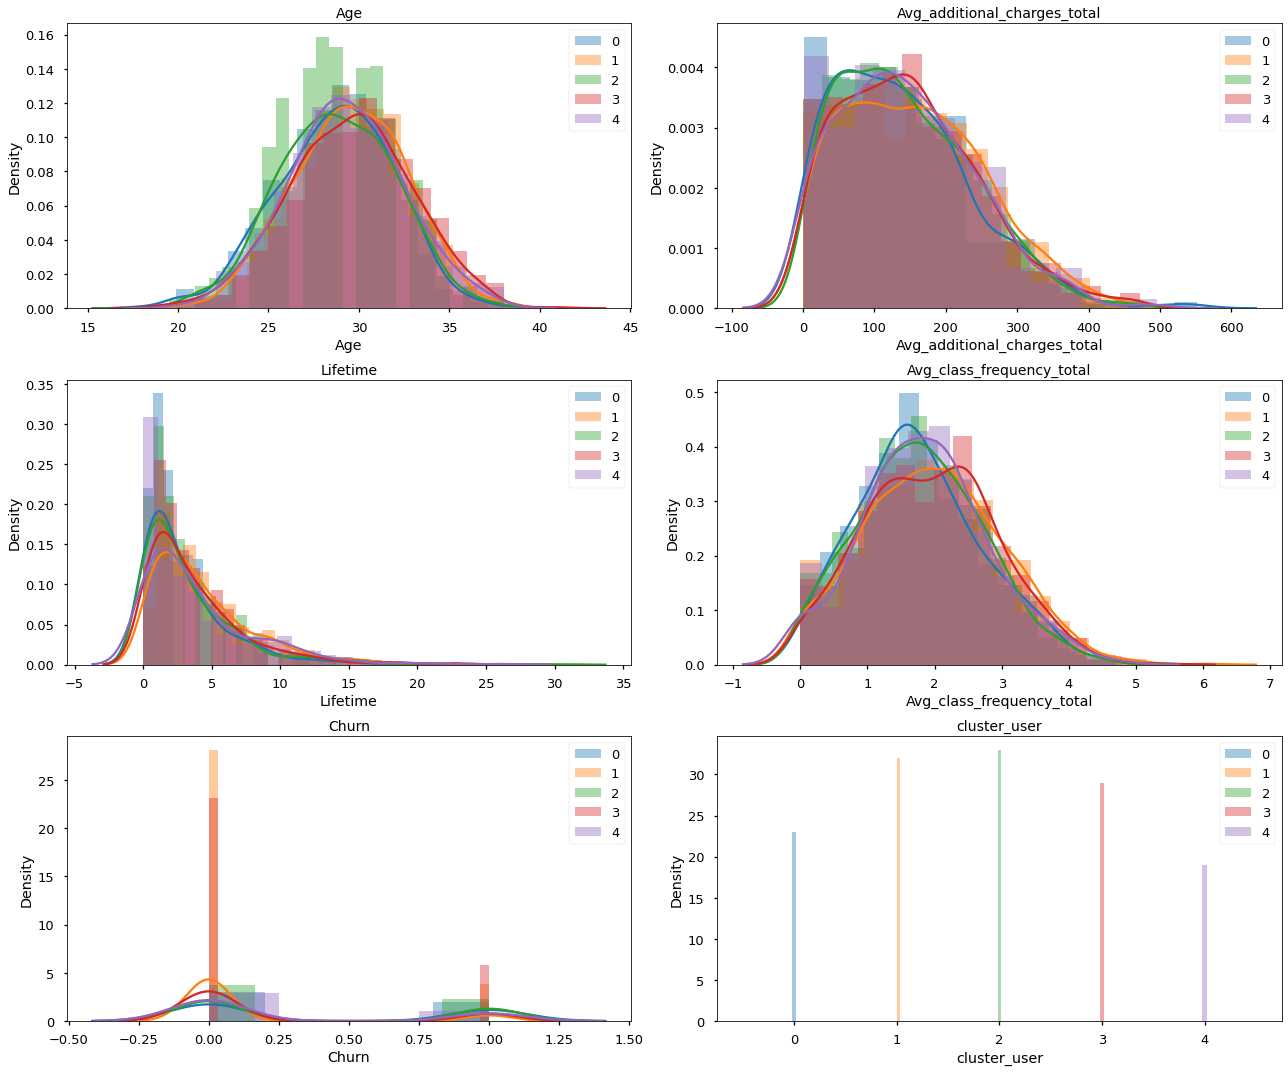

In [98]:
# select columns for drawing
cols = df.drop(columns = [
    'gender',
    'Near_Location',
    'Partner',
    'Promo_friends',
    'Phone',
    'Contract_period',
    'Group_visits'
   
]).columns

# set the size
fig, axes = plt.subplots(3,2, figsize = (18, 15))
axes = axes.ravel()

for col, ax in zip(cols, axes):

    sns.distplot(df[df['cluster_user'] == 0][col], ax = ax, label = '0')
    sns.distplot(df[df['cluster_user'] == 1][col], ax = ax, label = '1')
    sns.distplot(df[df['cluster_user'] == 2][col], ax = ax, label = '2')
    sns.distplot(df[df['cluster_user'] == 3][col], ax = ax, label = '3')
    sns.distplot(df[df['cluster_user'] == 4][col], ax = ax, label = '4')

    ax.set_title(f'{col}', fontsize = 14)
    ax.legend()

fig.tight_layout()
plt.show()

In [99]:
# The function builds histograms. The input takes a dataset and the number of columns in subplot

def show_hist_churn(df, columns, k_height):
    # set the size
    plt.figure(figsize=(17, df.columns.nunique()*k_height))

    # iterate over all column parameters
    for i, col in enumerate(df.drop('Churn', axis=1).columns):
        # for clarity, display histograms in subplot. We take the output position parameter +1, because indices in i go from 0
        ax=plt.subplot(int(df.columns.nunique()/columns)+1, columns, i+1)
        sns.histplot(data=df, x=col, hue='Churn', multiple="stack", kde=True, stat="density", linewidth=0) 
        # draw the mark of the middle
        plt.axvline(df.loc[df['Churn']==0, col].describe()['mean'], color='r', 
                    linestyle='dashed', linewidth=2, label='Left')
        # draw the label of the median + display its quantitative value
        plt.axvline(df.loc[df['Churn']==1, col].describe()['50%'], color='b', 
                    linestyle='dashed', linewidth=2, label='Нет')
        sns.color_palette("tab10")
        sns.set_style('whitegrid')
        plt.legend(title='Chorn', 
                   labels=['Stayed', 
                           'Left', 
                           '0_mean: {:.2f}'.format(df.loc[df['Churn']==0, col].describe()['mean']), 
                           '1_mean: {:.2f}'.format(df.loc[df['Churn']==1, col].describe()['mean'])], 
                   fontsize=12)
        plt.xlabel('')
        plt.ylabel('')
        plt.title(f'{col}', fontsize = 14) 
        if df[col].nunique() == 2:
            plt.xticks([0, 1])
    plt.tight_layout()
    plt.show()

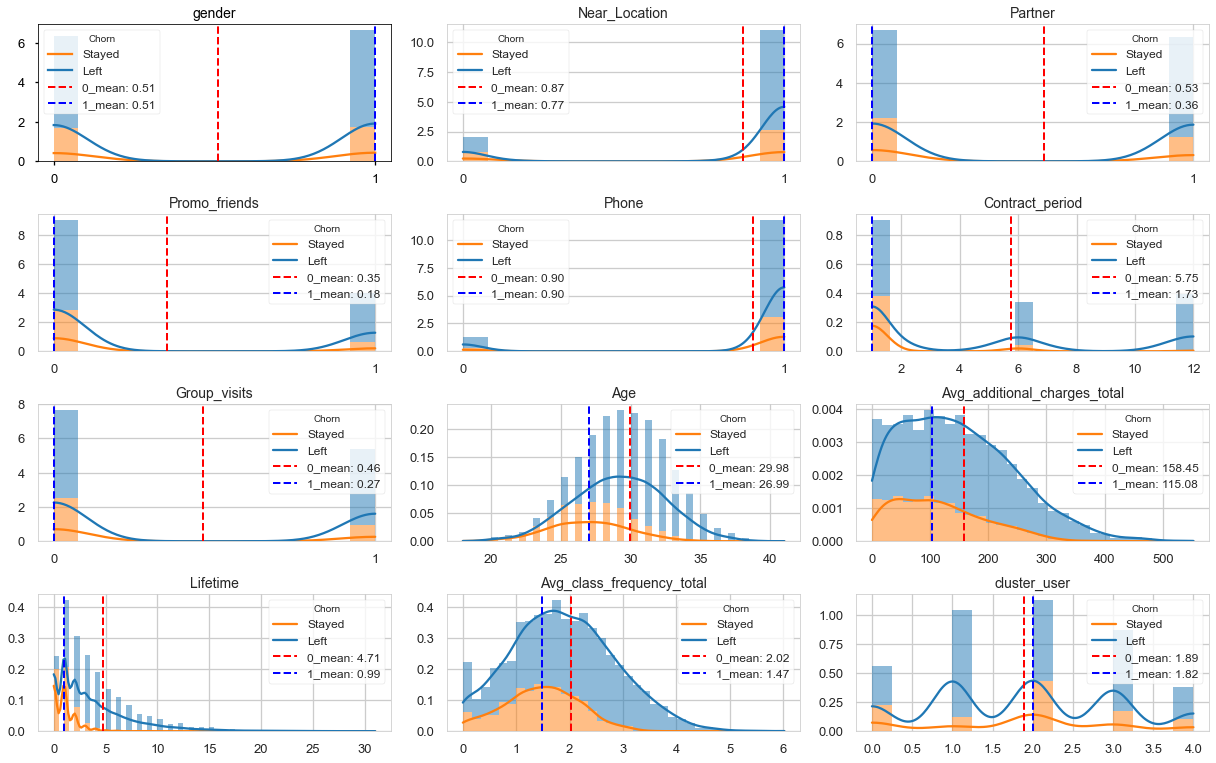

In [100]:
show_hist_churn(df, 3, 1)

The graphs show how different signs were distributed among those who stayed and those who left.

# Results

We have built two models.

Using metrics to determine the best.

After a series of manipulations, we trained the model and with its help divided our users into 5 groups.

All groups have a normal age distribution in the range from 20 to 40 years.

We have 5 user clusters - each cluster can be offered a specific product, payment / discount system or a set of options. This will allow more flexibility in meeting customer needs and increase the chance of continued annual service.


### Clusters 1 and 3 - continue more often than others¶

     It is better to listen to their opinion and thus support their interest in our business.

     You can consider the amount of potential profit for the year.

     When concluding contracts with new clients, it is important to pay attention to the specifics of clustering, to get a client who will renew the subscription.

### 0 and 2 clusters consist of those who leave more often

     Take into account the number of unrenewed subscriptions when planning annual profit/risk management.

     Track the cases of complaints from such customers and prioritize their appeals in order to improve the service.

### 4 cluster is divided 50/50

     these customers are just as important to the company

